In [1]:
import os
import glob
import pandas as pd
import numpy as np

In [2]:
os.chdir('C:\\Users\\Chris\\Desktop\\Linkbuilder stuff\\TotalCrypto Data\data on bitcoins bought')
os.getcwd()

'C:\\Users\\Chris\\Desktop\\Linkbuilder stuff\\TotalCrypto Data\\data on bitcoins bought'

## Getting Data Together

In [3]:
all_data = glob.glob(os.getcwd()+ "/*.xls")

In [4]:
list_ = []

for filename in all_data:
    df = pd.read_html(filename, index_col=0, header=0, parse_dates = True)
    list_.append(df)


In [5]:
concat = []
for x in range(len(list_)):
    concat.append(list_[x][0])

frame = pd.concat(concat, axis = 'columns')

In [6]:
frame = frame.fillna(0)
frame.columns = ['Bisq_BTC', 'Bisq_USD', 'Local_Bitcoins_BTC', 'Local_Bitcoins_USD', 'Paxful_BTC', 'Paxful_USD']
frame.head()

,Bisq_BTC,Bisq_USD,Local_Bitcoins_BTC,Local_Bitcoins_USD,Paxful_BTC,Paxful_USD
Label,,,,,,
2013-03-16,0.0,0.0,1995.09,87724,0.0,0.0
2013-03-23,0.0,0.0,3446.16,160281,0.0,0.0
2013-03-30,0.0,0.0,2520.35,166149,0.0,0.0
2013-04-06,0.0,0.0,3489.42,310090,0.0,0.0
2013-04-13,0.0,0.0,4460.55,623483,0.0,0.0


In [7]:
BTC_df = frame.loc[:,['Bisq_BTC','Local_Bitcoins_BTC','Paxful_BTC']]
USD_df = frame.loc[:,['Bisq_USD','Local_Bitcoins_USD','Paxful_USD']]

In [8]:
mnthly_avg_BTC = BTC_df.resample('M').sum()
mnthly_avg_USD = USD_df.resample('M').sum()
focus_BTC = mnthly_avg_BTC.truncate(after = '2019-03-31 00:00:00', before = '2016-04-30 00:00:00', axis = 'rows')
focus_USD = mnthly_avg_USD.truncate(after = '2019-03-31 00:00:00', before = '2016-04-30 00:00:00', axis = 'rows')

In [9]:
focus_BTC['total'] = focus_BTC.sum(1)
focus_USD['total'] = focus_USD.sum(1)

In [11]:
# Output totals for simple infograpic 
focus_USD.total.round(1).to_csv('USD_Total.csv')
focus_BTC.loc[:, 'total'].round(1).to_csv('BTC_Total.csv')

## Plot Data

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline  

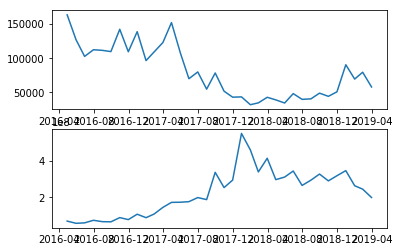

In [14]:
plt.figure(1)
plt.subplot(211)
plt.plot(focus_BTC.total)
plt.subplot(212)
plt.plot(focus_USD.total)